In [1]:
import math
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_context("poster")
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Chembl_bioactivity_SIRT1.tsv", delimiter="\t")

In [3]:
df.head(10)

,CMPD_CHEMBLID,MOLREGNO,PARENT_CMPD_CHEMBLID,PARENT_MOLREGNO,MOL_PREF_NAME,COMPOUND_KEY,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,CANONICAL_SMILES,ACTIVITY_ID,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,PCHEMBL_VALUE,PUBLISHED_TYPE,PUBLISHED_RELATION,PUBLISHED_VALUE,PUBLISHED_UNITS,ACTIVITY_COMMENT,DATA_VALIDITY_COMMENT,POTENTIAL_DUPLICATE,BAO_ENDPOINT,UO_UNITS,QUDT_UNITS,ASSAY_ID,ASSAY_CHEMBLID,ASSAY_TYPE,DESCRIPTION,ASSAY_SRC_ID,ASSAY_SRC_DESCRIPTION,ASSAY_ORGANISM,ASSAY_STRAIN,ASSAY_TAX_ID,CURATED_BY,BAO_FORMAT,TID,TARGET_CHEMBLID,TARGET_TYPE,PROTEIN_ACCESSION,PREF_NAME,ORGANISM,CONFIDENCE_SCORE,TARGET_MAPPING,APD_NAME,APD_CONFIDENCE,DOC_ID,DOC_CHEMBLID,PUBMED_ID,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,CELL_ID,CELL_CHEMBL_ID,CELL_NAME
0,CHEMBL511214,488322,CHEMBL511214,488322,NaN,31,407.42,4.19,124.17,0.0,Fc1ccc(NC(=S)NNC(=O)c2onc(n2)c3cccc4ccccc34)cc1,2569723,Inhibition,=,10.00,%,NaN,INH,=,10.00,%,NaN,NaN,0,BAO_0000201,UO_0000187,http://qudt.org/vocab/unit#Percent,514682,CHEMBL976454,B,Inhibition of human SIRT1 at 200 uM,1,Scientific Literature,Homo sapiens,NaN,9606.0,Autocuration,BAO_0000357,100448,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,9,Protein,NaN,NaN,44071,CHEMBL1155918,18642893.0,J. Med. Chem.,2008,51.0,15.0,4377.0,NaN,NaN,NaN
1,CHEMBL3311063,1780169,CHEMBL3311063,1780169,NaN,23,312.35,3.11,93.69,0.0,CCOc1ccccc1c2nn3c(nnc3s2)c4occc4,15035345,IC50,=,23600.00,nM,4.63,IC50,=,23.60,uM,NaN,NaN,0,BAO_0000190,UO_0000065,http://www.openphacts.org/units/Nanomolar,1453522,CHEMBL3362574,B,Inhibition of hexa-His-tagged recombinant huma...,1,Scientific Literature,Homo sapiens,NaN,9606.0,Autocuration,BAO_0000019,100448,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,9,Protein,SIR2,medium,90200,CHEMBL3351989,24880902.0,Bioorg. Med. Chem. Lett.,2014,24.0,14.0,3050.0,NaN,NaN,NaN
2,CHEMBL3577248,1945555,CHEMBL3577248,1945555,NaN,5,354.35,1.92,96.22,0.0,CC1(C)Oc2ccc(cc2[C@@H](O)[C@@H]1O)C3=COc4cc(O)...,15600024,Activity,NaN,NaN,NaN,NaN,Activity,NaN,NaN,NaN,Not Active,NaN,0,BAO_0000375,NaN,NaN,1496442,CHEMBL3580332,B,Increase in SIRT1 (unknown origin) deacetylati...,1,Scientific Literature,Homo sapiens,NaN,9606.0,Autocuration,BAO_0000357,100448,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,9,Protein,NaN,NaN,92330,CHEMBL3576836,25710081.0,J. Nat. Prod.,2015,78.0,4.0,666.0,NaN,NaN,NaN
3,CHEMBL1835299,1179352,CHEMBL1835299,1179352,NaN,15,275.37,-2.58,136.54,0.0,C[C@H](NC(=O)[C@@H](N)CCCCNC(=S)C)C(=O)O,6381060,Inhibition,=,46.90,%,NaN,INH,=,46.90,%,NaN,NaN,0,BAO_0000201,UO_0000187,http://qudt.org/vocab/unit#Percent,772577,CHEMBL1839552,B,Inhibition of recombinant GST-tagged SIRT1 at ...,1,Scientific Literature,NaN,NaN,NaN,Autocuration,BAO_0000357,100448,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,8,Homologous protein,NaN,NaN,59174,CHEMBL1833937,21895016.0,J. Med. Chem.,2011,54.0,19.0,6456.0,NaN,NaN,NaN
4,CHEMBL3233748,1732254,CHEMBL3233748,1732254,NaN,23,393.87,4.41,74.25,0.0,CC(C)c1ccc(cc1)C2=C(Cc3c(O)ccc4nc(Cl)ccc34)C(=...,14576571,IC50,=,21000.00,nM,4.68,IC50,=,21.00,uM,NaN,NaN,0,BAO_0000190,UO_0000065,http://www.openphacts.org/units/Nanomolar,1338278,CHEMBL3242721,B,Inhibition of C-terminal His-6-tagged recombin...,1,Scientific Literature,Homo sapiens,NaN,9606.0,Autocuration,BAO_0000019,100448,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,9,Protein,SIR2,medium,82318,CHEMBL3232806,24697269.0,J. Med. Chem.,2014,57.0,8.0,3283.0,NaN,NaN,NaN
5,CHEMBL3233748,1732254,CHEMBL3233748,1732254,NaN,23,393.87,4.41,74.25,0.0,CC(C)c1ccc(cc1)C2=C(Cc3c(O)ccc4nc(Cl)ccc34)C(=...,14576511,Inhibition,=,85.00,%,NaN,INH,=,85.00,%,NaN,NaN,0,BAO_0000201,UO_0000187,http://qudt.org/vocab/unit#Percent,1338275,CHEMBL3242718,B,Inhibition of C-terminal His-6-tagged recombin...,1,Scientific Literature,Homo sapiens,NaN,9606.0,Autocuration,BAO_0000019,100448,CHEMBL4506,SINGLE PROTEIN,

In [4]:
df.describe(include="all")

,CMPD_CHEMBLID,MOLREGNO,PARENT_CMPD_CHEMBLID,PARENT_MOLREGNO,MOL_PREF_NAME,COMPOUND_KEY,MOLWEIGHT,ALOGP,PSA,NUM_RO5_VIOLATIONS,CANONICAL_SMILES,ACTIVITY_ID,STANDARD_TYPE,RELATION,STANDARD_VALUE,STANDARD_UNITS,PCHEMBL_VALUE,PUBLISHED_TYPE,PUBLISHED_RELATION,PUBLISHED_VALUE,PUBLISHED_UNITS,ACTIVITY_COMMENT,DATA_VALIDITY_COMMENT,POTENTIAL_DUPLICATE,BAO_ENDPOINT,UO_UNITS,QUDT_UNITS,ASSAY_ID,ASSAY_CHEMBLID,ASSAY_TYPE,DESCRIPTION,ASSAY_SRC_ID,ASSAY_SRC_DESCRIPTION,ASSAY_ORGANISM,ASSAY_STRAIN,ASSAY_TAX_ID,CURATED_BY,BAO_FORMAT,TID,TARGET_CHEMBLID,TARGET_TYPE,PROTEIN_ACCESSION,PREF_NAME,ORGANISM,CONFIDENCE_SCORE,TARGET_MAPPING,APD_NAME,APD_CONFIDENCE,DOC_ID,DOC_CHEMBLID,PUBMED_ID,JOURNAL,YEAR,VOLUME,ISSUE,FIRST_PAGE,CELL_ID,CELL_CHEMBL_ID,CELL_NAME
count,2133,2.133000e+03,2133,2.133000e+03,157,2133,2129.000000,2107.000000,2107.000000,2107.000000,2133,2.133000e+03,2133,1581,1.581000e+03,1502,515.000000,2133,1581,1581.000000,1502,552,79,2133.000000,2133,1502,1502,2.133000e+03,2133,2133,2133,2133.000000,2133,1894,0.0,1894.0,2133,2133,2133.0,2133,2133,2133,2133,2133,2133.000000,2133,462,462,2133.000000,2133,1.995000e+03,2120,2133.000000,2120.000000,1870.00000,2120.000000,68.000000,68,68
unique,1241,NaN,1234,NaN,46,535,NaN,NaN,NaN,NaN,1241,NaN,17,3,NaN,4,NaN,17,3,NaN,6,5,3,NaN,13,4,4,NaN,285,1,278,NaN,2,1,NaN,NaN,3,3,NaN,1,1,1,1,1,NaN,2,1,1,NaN,91,NaN,9,NaN,NaN,NaN,NaN,NaN,4,4
top,CHEMBL165,NaN,CHEMBL165,NaN,RESVERATROL,1,NaN,NaN,NaN,NaN,Oc1ccc(\C=C\c2cc(O)cc(O)c2)cc1,NaN,Inhibition,=,NaN,%,NaN,INH,=,NaN,%,Not Active,Outside typical range,NaN,BAO_0000190,UO_0000187,http://qudt.org/vocab/unit#Percent,NaN,CHEMBL2156441,B,Inhibition of human recombinant SIRT1 using Fl...,NaN,Scientific Literature,Homo sapiens,NaN,NaN,Autocuration,BAO_0000357,NaN,CHEMBL4506,SINGLE PROTEIN,Q96EB6,NAD-dependent deacetylase sirtuin 1,Homo sapiens,NaN,Protein,SIR2,medium,NaN,CHEMBL1944602,NaN,J. Med. Chem.,NaN,NaN,NaN,NaN,NaN,CHEMBL3308403,MCF7
freq,27,NaN,27,NaN,27,62,NaN,NaN,NaN,NaN,27,NaN,891,1375,NaN,739,NaN,856,1375,NaN,739,212,76,NaN,727,739,739,NaN,76,2133,76,NaN,2120,1894,NaN,NaN,1958,1236,NaN,2133,2133,2133,2133,2133,NaN,1894,462,462,NaN,191,NaN,860,NaN,NaN,NaN,NaN,NaN,37,37
mean,NaN,1.130345e+06,NaN,1.126423e+06,NaN,NaN,418.351644,3.471799,99.026635,0.463218,NaN,9.876816e+06,NaN,NaN,9.666434e+05,NaN,5.129010,NaN,NaN,572.464414,NaN,NaN,NaN,0.020628,NaN,NaN,NaN,9.378864e+05,NaN,NaN,NaN,1.219409,NaN,NaN,NaN,9606.0,NaN,NaN,100448.0,NaN,NaN,NaN,NaN,NaN,8.887951,NaN,NaN,NaN,66744.857478,NaN,2.234801e+07,NaN,2011.708861,49.802358,165.14492,3108.848585,591.117647,NaN,NaN
std,NaN,5.650580e+05,NaN,5.671333e+05,NaN,NaN,160.595223,2.080351,53.593765,0.773462,NaN,4.925181e+06,NaN,NaN,3.696993e+07,NaN,0.917914,NaN,NaN,8930.085640,NaN,NaN,NaN,0.142170,NaN,NaN,NaN,3.452634e+05,NaN,NaN,NaN,2.802548,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.315500,NaN,NaN,NaN,16746.990639,NaN,2.464118e+06,NaN,2.352616,58.144968,1022.07200,2617.660328,130.802977,NaN,NaN
min,NaN,2.130000e+02,NaN,2.130000e+02,NaN,NaN,110.110000,-5.970000,8.170000,0.000000,NaN,1.653881e+06,NaN,NaN,-2.200000e+01,NaN,4.000000,NaN,NaN,-22.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,3.252780e+05,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,9606.0,NaN,NaN,100448.0,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,30312.000000,NaN,1.630282e+07,NaN,2005.000000,1.000000,1.00000,58.000000,325.000000,NaN,NaN
25%,NaN,5.200400e+05,NaN,5.055830e+05,NaN,NaN,333.380000,2.730000,62.820000,0.000000,NaN,6.263286e+06,NaN,NaN,1.910000e+01,NaN,4.390000,NaN,NaN,5.900000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,7.526530e+05,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,9606.0,NaN,NaN,100448.0,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,57995.000000,NaN,2.063076e+07,NaN,2010.000000,20.000000,5.00000,761.000000,491.000000,NaN,NaN
50%,NaN,1.276634e+06,NaN,1.284594e+06,NaN,NaN,408.440000,3.630000,91.850000,0.000000,NaN,1.210068e+07,NaN,NaN,1.080000e+02,NaN,4.890000,NaN,NaN,26.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,8.615610e+05,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,9606.0,NaN,NaN,

In [5]:
df.columns

Index(['CMPD_CHEMBLID', 'MOLREGNO', 'PARENT_CMPD_CHEMBLID', 'PARENT_MOLREGNO',
       'MOL_PREF_NAME', 'COMPOUND_KEY', 'MOLWEIGHT', 'ALOGP', 'PSA',
       'NUM_RO5_VIOLATIONS', 'CANONICAL_SMILES', 'ACTIVITY_ID',
       'STANDARD_TYPE', 'RELATION', 'STANDARD_VALUE', 'STANDARD_UNITS',
       'PCHEMBL_VALUE', 'PUBLISHED_TYPE', 'PUBLISHED_RELATION',
       'PUBLISHED_VALUE', 'PUBLISHED_UNITS', 'ACTIVITY_COMMENT',
       'DATA_VALIDITY_COMMENT', 'POTENTIAL_DUPLICATE', 'BAO_ENDPOINT',
       'UO_UNITS', 'QUDT_UNITS', 'ASSAY_ID', 'ASSAY_CHEMBLID', 'ASSAY_TYPE',
       'DESCRIPTION', 'ASSAY_SRC_ID', 'ASSAY_SRC_DESCRIPTION',
       'ASSAY_ORGANISM', 'ASSAY_STRAIN', 'ASSAY_TAX_ID', 'CURATED_BY',
       'BAO_FORMAT', 'TID', 'TARGET_CHEMBLID', 'TARGET_TYPE',
       'PROTEIN_ACCESSION', 'PREF_NAME', 'ORGANISM', 'CONFIDENCE_SCORE',
       'TARGET_MAPPING', 'APD_NAME', 'APD_CONFIDENCE', 'DOC_ID',
       'DOC_CHEMBLID', 'PUBMED_ID', 'JOURNAL', 'YEAR', 'VOLUME', 'ISSUE',
       'FIRST_PAGE', 'CELL_ID',

In [6]:
# use only compounds with IC50
# columns: chemblID, doc_chemblid, smiles, relation, standard_value, standard_units
df_ic50 = df[df.STANDARD_TYPE == "IC50"][["CMPD_CHEMBLID", "DOC_CHEMBLID", "CANONICAL_SMILES", "RELATION", "STANDARD_VALUE", "STANDARD_UNITS"]]
df_ic50["DOC_CHEMBLID"] = df_ic50["DOC_CHEMBLID"].astype(str)

In [7]:
df_ic50.head(10)

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS
1,CHEMBL3311063,CHEMBL3351989,CCOc1ccccc1c2nn3c(nnc3s2)c4occc4,=,23600.0,nM
4,CHEMBL3233748,CHEMBL3232806,CC(C)c1ccc(cc1)C2=C(Cc3c(O)ccc4nc(Cl)ccc34)C(=...,=,21000.0,nM
9,CHEMBL3408982,CHEMBL3407343,CCCCCCCCn1c2CCN(CCO)Cc2c3cc(ccc13)c4cnc(N)nc4,NaN,NaN,NaN
10,CHEMBL1140,CHEMBL3390834,NC(=O)c1cccnc1,=,25000.0,nM
12,CHEMBL2332054,CHEMBL2331260,CC(C)(C)C(=O)NCC1CCN(CC1)c2ncnc3cc(sc23)C(=O)N,=,4300.0,nM
14,CHEMBL1140,CHEMBL3407343,NC(=O)c1cccnc1,=,149000.0,nM
15,CHEMBL3408831,CHEMBL3407343,CCCCCCCCn1c2CCNCc2c3cc(ccc13)c4cccc(C)c4,=,20000.0,nM
16,CHEMBL584353,CHEMBL1155190,CC(=S)NCCCC[C@H](NC(=O)OCc1ccccc1)C(=O)Nc2ccccc2,=,2700.0,nM
17,CHEMBL1254694,CHEMBL1250463,COC(=O)[C@H](C)NC(=O)[C@H](CCCCNC(=O)c1cccnc1)...,NaN,NaN,NaN
19,CHEMBL3219552,CHEMBL3217484,CCCOc1ccc(CN2C(=S)NC(=O)C(=C2c3ccccc3)Cc4c(OC)...,=,61900.0,nM


In [8]:
df_ic50.describe(include="all")

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS
count,727,727,727,630,6.300000e+02,630
unique,602,60,602,3,NaN,2
top,CHEMBL420311,CHEMBL2150931,NC(=O)C1CCCc2c1[nH]c3ccc(Cl)cc23,=,NaN,nM
freq,18,76,18,503,NaN,628
mean,NaN,NaN,NaN,NaN,2.422803e+06,NaN
std,NaN,NaN,NaN,NaN,5.856369e+07,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,5.675000e+03,NaN
50%,NaN,NaN,NaN,NaN,4.020000e+04,NaN
75%,NaN,NaN,NaN,NaN,8.980000e+04,NaN


Some compounds are duplicated, so check duplicate rows.

In [9]:
df_ic50_duplicated = df_ic50[df_ic50.duplicated(subset="CMPD_CHEMBLID", keep=False)]
df_ic50_duplicated.sort_values(by=["CMPD_CHEMBLID", "DOC_CHEMBLID"])

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS
2067,CHEMBL112265,CHEMBL1140425,NC(=O)C1CCCc2c1[nH]c3ccccc23,=,1470.0,nM
2068,CHEMBL112265,CHEMBL1140425,NC(=O)C1CCCc2c1[nH]c3ccccc23,=,3300.0,nM
20,CHEMBL1140,CHEMBL1138922,NC(=O)c1cccnc1,=,520000.0,nM
1398,CHEMBL1140,CHEMBL1152589,NC(=O)c1cccnc1,=,250000.0,nM
859,CHEMBL1140,CHEMBL1155190,NC(=O)c1cccnc1,=,100000.0,nM
970,CHEMBL1140,CHEMBL2203031,NC(=O)c1cccnc1,=,50000.0,nM
1871,CHEMBL1140,CHEMBL2311269,NC(=O)c1cccnc1,=,90400.0,nM
1410,CHEMBL1140,CHEMBL3351796,NC(=O)c1cccnc1,=,73000.0,nM
10,CHEMBL1140,CHEMBL3390834,NC(=O)c1cccnc1,=,25000.0,nM
14,CHEMBL1140,CHEMBL3407343,NC(=O)c1cccnc1,=,149000.0,nM


There are two types of duplicated row.

* A compound is tested a few times by an experiment. (ex: CHEMBL112265)
* A compound is tested by multiple experiments. (ex: CHEMBL1140)

There are naive approaches to handle duplicated rows.

* Use first (or last) row and drop the others.
* Calculate average score.

If you use the second approach, you should take care of multiple relation type.
For example, IC50 of CHEMBL86537 is reported as "> 500000.0" and "= 96200.0".
It is naive approach to ignore the relation type of ">", but a little information is lost.

Next, check each compounds is active or inactive.
In this notebook, it is assumed that compounds with IC50 < 10 uM are active.
In the case of duplicated row, first row is used (other duplicated rows are ignored).
If IC50 of a compound is not reported, the compound is assumed as inactive. (really???)

In [10]:
df_ic50_uniq = df_ic50.drop_duplicates(subset="CMPD_CHEMBLID", keep="first")

In [11]:
df_ic50_uniq.RELATION.drop_duplicates()

1        =
9      NaN
31       >
521      <
Name: RELATION, dtype: object

In [12]:
def is_active(relation, standard_value, standard_unit, ic50_threshold=10):
    # None: uncertain
    if standard_unit == "nM":
        ic50_um = standard_value * 1e-3
    elif isinstance(standard_unit, float) and math.isnan(standard_unit):
        return False
    else:
        return None
    
    if relation == "=":
        return ic50_um < ic50_threshold
    elif relation == ">":
        if ic50_um >= ic50_threshold:
            return False
        else:
            return None
    elif relation == "<":
        if ic50_um < ic50_threshold:
            return True
        else:
            return None
    else:
        raise ValueError(relation, standard_value, standard_unit)

In [13]:
df_ic50_uniq["is_active"] = df_ic50_uniq.apply(lambda row: is_active(row.RELATION, row.STANDARD_VALUE, row.STANDARD_UNITS), axis=1)

/Users/shogo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
df_ic50_uniq

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS,is_active
1,CHEMBL3311063,CHEMBL3351989,CCOc1ccccc1c2nn3c(nnc3s2)c4occc4,=,23600.0,nM,False
4,CHEMBL3233748,CHEMBL3232806,CC(C)c1ccc(cc1)C2=C(Cc3c(O)ccc4nc(Cl)ccc34)C(=...,=,21000.0,nM,False
9,CHEMBL3408982,CHEMBL3407343,CCCCCCCCn1c2CCN(CCO)Cc2c3cc(ccc13)c4cnc(N)nc4,NaN,NaN,NaN,False
10,CHEMBL1140,CHEMBL3390834,NC(=O)c1cccnc1,=,25000.0,nM,False
12,CHEMBL2332054,CHEMBL2331260,CC(C)(C)C(=O)NCC1CCN(CC1)c2ncnc3cc(sc23)C(=O)N,=,4300.0,nM,True
15,CHEMBL3408831,CHEMBL3407343,CCCCCCCCn1c2CCNCc2c3cc(ccc13)c4cccc(C)c4,=,20000.0,nM,False
16,CHEMBL584353,CHEMBL1155190,CC(=S)NCCCC[C@H](NC(=O)OCc1ccccc1)C(=O)Nc2ccccc2,=,2700.0,nM,True
17,CHEMBL1254694,CHEMBL1250463,COC(=O)[C@H](C)NC(=O)[C@H](CCCCNC(=O)c1cccnc1)...,NaN,NaN,NaN,False
19,CHEMBL3219552,CHEMBL3217484,CCCOc1ccc(CN2C(=S)NC(=O)C(=C2c3ccccc3)Cc4c(OC)...,=,61900.0,nM,False
21,CHEMBL561194,CHEMBL3390834,NC(=O)c1ccccc1Nc2ccccc2,=,17000.0,nM,False


In [15]:
df_ic50_uniq.describe(include="all")

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS,is_active
count,602,602,602,508,5.080000e+02,508,600
unique,602,56,602,3,NaN,2,2
top,CHEMBL3219560,CHEMBL2150931,NC(=O)c1ccccc1Nc2cccc(\C=C\C(=O)O)c2,=,NaN,nM,False
freq,1,69,1,391,NaN,506,455
mean,NaN,NaN,NaN,NaN,2.988393e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,6.521764e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.075000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.003000e+04,NaN,NaN
75%,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN


In [16]:
# activity is uncertain
df_ic50_uniq[pd.isnull(df_ic50_uniq.is_active)]

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS,is_active
225,CHEMBL562474,CHEMBL1153494,NC(=O)c1ccccc1Nc2ccc(Oc3ccccc3)cc2,=,0.0,%,None
298,CHEMBL562473,CHEMBL1153494,NC(=O)c1ccccc1Nc2ccc(cc2)c3ccccc3,=,36.0,%,None


In [17]:
# drop records with uncertain activity
df_ic50_uniq = df_ic50_uniq.dropna(subset=["is_active"])

In [18]:
df_ic50_uniq.describe(include="all")

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS,is_active
count,600,600,600,506,5.060000e+02,506,600
unique,600,56,600,3,NaN,1,2
top,CHEMBL3219560,CHEMBL2150931,NC(=O)c1ccccc1Nc2cccc(\C=C\C(=O)O)c2,=,NaN,nM,False
freq,1,69,1,389,NaN,506,455
mean,NaN,NaN,NaN,NaN,3.000204e+06,NaN,NaN
std,NaN,NaN,NaN,NaN,6.534639e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,3.600000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,6.300000e+03,NaN,NaN
50%,NaN,NaN,NaN,NaN,4.018000e+04,NaN,NaN
75%,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN


In [19]:
df_ic50_uniq.is_active.describe()

count       600
unique        2
top       False
freq        455
Name: is_active, dtype: object

Active: 145 / 600, Inactive: 455 / 600

Next, check the distribution of molecular weight, logP, HBA and HBD.

In [20]:
Descriptors._descList

[('MolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons>),
 ('MaxPartialCharge', <function rdkit.Chem.Descriptors.MaxPartialCharge>),
 ('MinPartialCharge', <function rdkit.Chem.Descriptors.MinPartialCharge>),
 ('MaxAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MaxAbsPartialCharge>),
 ('MinAbsPartialCharge',
  <function rdkit.Chem.Descriptors.MinAbsPartialCharge>),
 ('MaxEStateIndex', <function rdkit.Chem.EState.EState.MaxEStateIndex>),
 ('MinEStateIndex', <function rdkit.Chem.EState.EState.MinEStateIndex>),
 ('MaxAbsEStateIndex', <function rdkit.Chem.EState.EState.MaxAbsEStateIndex>),
 ('MinAbsEStateIndex', <function rdkit.Chem.EState.EState.MinAbsEStateIndex>),
 ('BalabanJ', <function rdkit.Ch

In [21]:
descriptor_names = ["MolWt", "MolLogP", "NumHAcceptors", "NumHDonors"]
def get_descriptor_list(descriptor_names):
    # [(descriptor_name, descriptor_func), ...]
    func_dict = {}
    for tp in Descriptors._descList:
        if tp[0] in descriptor_names:
            func_dict[tp[0]] = tp[1]
    ret_descriptor_list = []
    for descriptor_name in descriptor_names:
        ret_descriptor_list.append((descriptor_name, func_dict[descriptor_name]))
    return ret_descriptor_list

descriptor_list = get_descriptor_list(descriptor_names)

def calc_descriptors(smiles, descriptor_list):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None
    
    ret = {}
    for descriptor_tp in descriptor_list:
        descriptor_name = descriptor_tp[0]
        descriptor_calc_func = descriptor_tp[1]
        ret[descriptor_name] = descriptor_calc_func(mol)
    return ret

In [22]:
descriptor_list

[('MolWt', <function rdkit.Chem.Descriptors.<lambda>>),
 ('MolLogP', <function rdkit.Chem.Crippen.<lambda>>),
 ('NumHAcceptors', <function rdkit.Chem.Lipinski.<lambda>>),
 ('NumHDonors', <function rdkit.Chem.Lipinski.<lambda>>)]

In [23]:
descriptor_names

['MolWt', 'MolLogP', 'NumHAcceptors', 'NumHDonors']

In [24]:
df_ic50_uniq_descriptors = df_ic50_uniq.apply(lambda row: pd.Series(calc_descriptors(row["CANONICAL_SMILES"], descriptor_list)), axis=1)

In [25]:
df_ic50_uniq = pd.concat([df_ic50_uniq, df_ic50_uniq_descriptors], axis=1)

In [26]:
df_ic50_uniq

,CMPD_CHEMBLID,DOC_CHEMBLID,CANONICAL_SMILES,RELATION,STANDARD_VALUE,STANDARD_UNITS,is_active,MolLogP,MolWt,NumHAcceptors,NumHDonors
1,CHEMBL3311063,CHEMBL3351989,CCOc1ccccc1c2nn3c(nnc3s2)c4occc4,=,23600.0,nM,False,3.51150,312.354,7.0,0.0
4,CHEMBL3233748,CHEMBL3232806,CC(C)c1ccc(cc1)C2=C(Cc3c(O)ccc4nc(Cl)ccc34)C(=...,=,21000.0,nM,False,4.99140,393.874,3.0,3.0
9,CHEMBL3408982,CHEMBL3407343,CCCCCCCCn1c2CCN(CCO)Cc2c3cc(ccc13)c4cnc(N)nc4,NaN,NaN,NaN,False,4.39140,421.589,6.0,2.0
10,CHEMBL1140,CHEMBL3390834,NC(=O)c1cccnc1,=,25000.0,nM,False,0.18050,122.127,2.0,1.0
12,CHEMBL2332054,CHEMBL2331260,CC(C)(C)C(=O)NCC1CCN(CC1)c2ncnc3cc(sc23)C(=O)N,=,4300.0,nM,True,2.16890,375.498,6.0,2.0
15,CHEMBL3408831,CHEMBL3407343,CCCCCCCCn1c2CCNCc2c3cc(ccc13)c4cccc(C)c4,=,20000.0,nM,False,6.62292,374.572,2.0,1.0
16,CHEMBL584353,CHEMBL1155190,CC(=S)NCCCC[C@H](NC(=O)OCc1ccccc1)C(=O)Nc2ccccc2,=,2700.0,nM,True,4.02730,413.543,4.0,3.0
17,CHEMBL1254694,CHEMBL1250463,COC(=O)[C@H](C)NC(=O)[C@H](CCCCNC(=O)c1cccnc1)...,NaN,NaN,NaN,False,-0.33120,449.508,7.0,4.0
19,CHEMBL3219552,CHEMBL3217484,CCCOc1ccc(CN2C(=S)NC(=O)C(=C2c3ccccc3)Cc4c(OC)...,=,61900.0,nM,False,7.16259,522.670,5.0,1.0
21,CHEMBL561194,CHEMBL3390834,NC(=O)c1ccccc1Nc2ccccc2,=,17000.0,nM,False,2.52910,212.252,2.0,2.0


/Users/shogo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


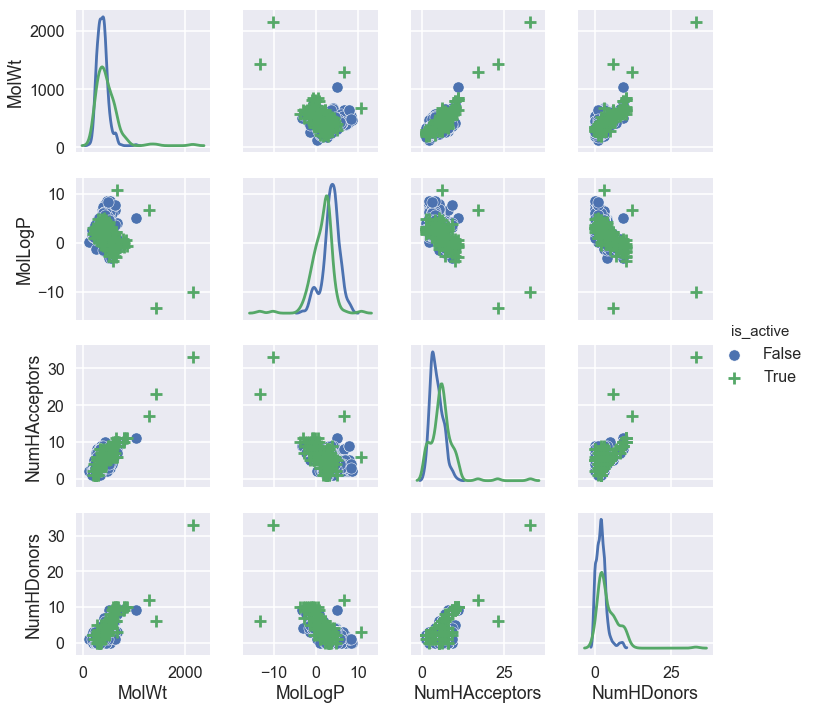

In [27]:
sns.pairplot(df_ic50_uniq, hue="is_active", vars=descriptor_names, markers=["o", "+"], diag_kind="kde")

We can see that compounds with very large molecular weight are included in this dataset.
For now, compounds with molwt >= 1000 are removed.

In [28]:
df_ic50_uniq_removed_outlier = df_ic50_uniq[df_ic50_uniq.MolWt < 1000]

/Users/shogo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


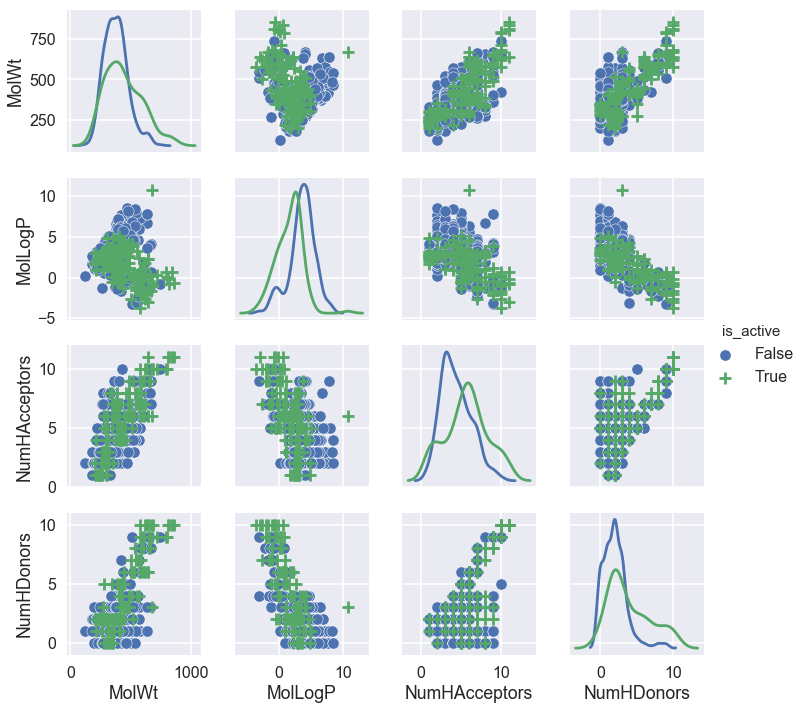

In [29]:
sns.pairplot(df_ic50_uniq_removed_outlier, hue="is_active", vars=descriptor_names, markers=["o", "+"], diag_kind="kde")

Is it difficult to classify compounds with these four basic descriptors ?